In [130]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.feature_selection

In [131]:
# read in data, add headers
dataset = pd.read_fwf('auto-mpg.data', header=None, names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"])
dataset.replace({'horsepower': {'?': np.nan}}, regex=False,inplace=True)
dataset["horsepower"] = pd.to_numeric(dataset["horsepower"])
dataset['horsepower']=dataset['horsepower'].fillna(dataset['horsepower'].mean())

X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [132]:
# clean the data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X[:, 0:7])
X = imp.transform(X[:, 0:7])


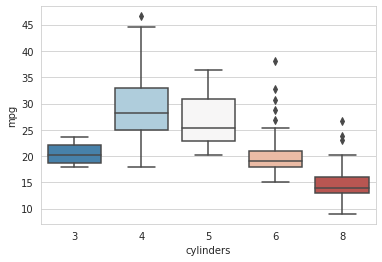

In [133]:
# plots of each x with y to check for linearity

# cylinders
sns.set_style('whitegrid')
sns.boxplot(x='cylinders', y="mpg", data=dataset,palette='RdBu_r')

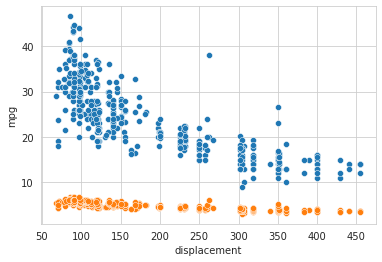

In [134]:
# displacement
sns.scatterplot(x='displacement', y="mpg", data=dataset,palette='RdBu_r')
dataset['mpg'] = np.sqrt(dataset['mpg'])
sns.scatterplot(x='displacement', y="mpg", data=dataset,palette='RdBu_r')

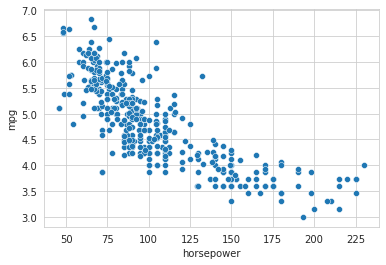

In [135]:
# horsepower
sns.scatterplot(x='horsepower', y="mpg", data=dataset,palette='RdBu_r')

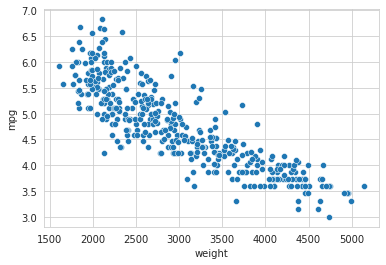

In [136]:
# weight
sns.scatterplot(x='weight', y="mpg", data=dataset,palette='RdBu_r')

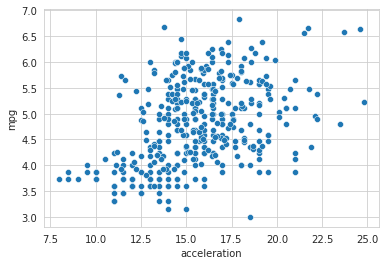

In [137]:
# acceleration
sns.scatterplot(x='acceleration', y='mpg', data=dataset,palette='RdBu_r')

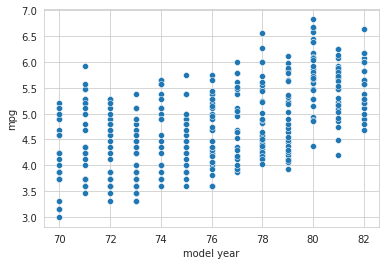

In [138]:
# model year
sns.scatterplot(x='model year', y='mpg', data=dataset,palette='RdBu_r')

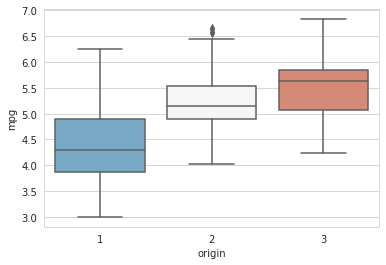

In [139]:
# origin
sns.boxplot(x='origin', y="mpg", data=dataset,palette='RdBu_r')

In [140]:
# get the dummy variables
dataset = pd.get_dummies(dataset, columns=['cylinders', 'origin'])
print(dataset.head()) 

        mpg  displacement  horsepower  ...  origin_1  origin_2  origin_3
0  4.242641         307.0       130.0  ...         1         0         0
1  3.872983         350.0       165.0  ...         1         0         0
2  4.242641         318.0       150.0  ...         1         0         0
3  4.000000         304.0       150.0  ...         1         0         0
4  4.123106         302.0       140.0  ...         1         0         0

[5 rows x 15 columns]


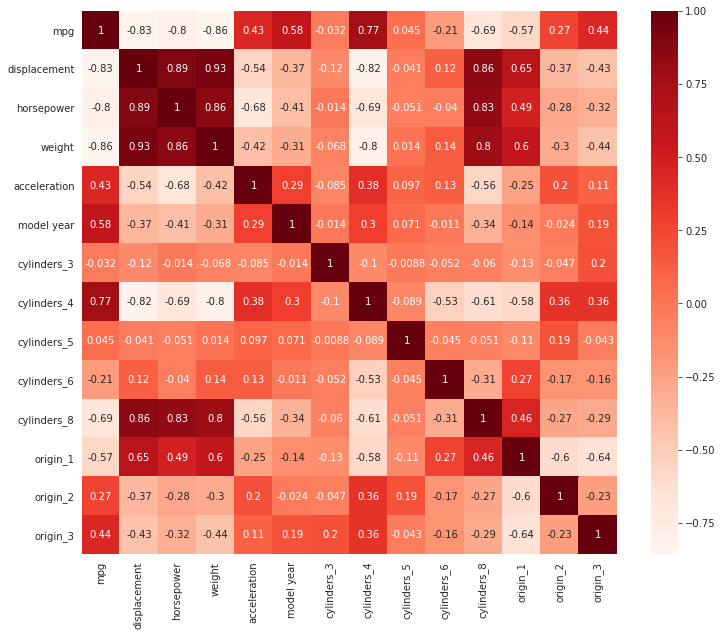

In [141]:
# plot pearson correlations
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [142]:
# find the correlation of each x with y 
cor_target = abs(cor["mpg"])

# select correlated features
relevant_features = cor_target[cor_target>0.001]
print(relevant_features)

# set X to the relevant features
X = dataset[["displacement", "horsepower", "weight", "acceleration", "model year", "cylinders_3", "cylinders_4", "cylinders_5", "cylinders_6", "cylinders_8", "origin_1", "origin_2", "origin_3"]].values

mpg             1.000000
displacement    0.832829
horsepower      0.800930
weight          0.857425
acceleration    0.434465
model year      0.579853
cylinders_3     0.032124
cylinders_4     0.772542
cylinders_5     0.044600
cylinders_6     0.212344
cylinders_8     0.685326
origin_1        0.571309
origin_2        0.266238
origin_3        0.439070
Name: mpg, dtype: float64


In [143]:
# split dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [144]:
# Trains multiple linear regression on training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X, y))

0.8744513297955312


In [145]:
# prints predicted, real values
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=3) # 2 decimal places
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5.708 5.675]
 [5.153 5.235]
 [4.808 4.69 ]
 [5.936 6.14 ]
 [3.83  4.   ]
 [4.02  3.317]
 [5.238 5.788]
 [4.661 5.   ]
 [5.579 5.657]
 [4.019 4.   ]
 [5.118 5.292]
 [5.659 5.612]
 [4.06  4.   ]
 [5.598 5.874]
 [4.531 4.183]
 [5.213 5.196]
 [5.627 5.385]
 [5.82  5.84 ]
 [4.645 4.733]
 [4.148 3.937]
 [5.716 5.865]
 [5.524 5.831]
 [4.879 4.899]
 [4.164 4.472]
 [5.707 5.568]
 [4.658 4.37 ]
 [5.406 5.   ]
 [5.121 5.282]
 [5.568 5.385]
 [4.328 4.637]
 [4.995 4.95 ]
 [5.496 5.385]
 [4.434 4.266]
 [5.615 5.891]
 [4.852 4.472]
 [4.478 4.796]
 [5.414 5.385]
 [4.027 4.243]
 [4.401 4.405]
 [5.69  5.788]
 [5.327 4.95 ]
 [3.615 3.742]
 [4.544 3.873]
 [4.951 5.099]
 [4.177 4.183]
 [5.346 5.568]
 [5.563 6.   ]
 [3.45  3.742]
 [4.404 4.796]
 [3.916 3.606]
 [4.437 4.243]
 [4.375 4.301]
 [3.598 3.606]
 [4.974 5.04 ]
 [5.959 5.84 ]
 [4.072 3.873]
 [4.792 4.899]
 [5.366 5.196]
 [5.104 6.164]
 [3.835 3.742]
 [4.236 4.243]
 [5.416 5.459]
 [4.897 4.494]
 [5.344 5.196]
 [6.047 5.568]
 [3.639 3.742]
 [4.27  4.

In [146]:
# gets the linear regression coefficients and intercept
print(regressor.coef_)
print(regressor.intercept_)

[ 0.002 -0.003 -0.001  0.005  0.071 -0.515  0.202  0.282 -0.053  0.085
 -0.132  0.04   0.092]
1.1915367975331304


In [156]:
#@title 1970-1982 Car MPG Predictor
Displacement = 350 #@param {type:"number"}
Horsepower = 165 #@param {type:"number"}
Weight = 3693 #@param {type:"number"}
Acceleration = 11.5 #@param {type:"number"}
Year = 1970 #@param {type:"slider", min:1970, max:1982, step:1}
Cylinders = '8' #@param ["3", "4", "5", "6","8"]
Origin = 'American' #@param ["American", "European", "Japanese"]


user_result = [None] * 13
user_result[0] = Displacement
user_result[1] = Horsepower
user_result[2] = Weight
user_result[3] = Acceleration
user_result[4] = Year - 1900
user_result[5] = 1 if Cylinders == '3' else 0
user_result[6] = 1 if Cylinders == '4' else 0
user_result[7] = 1 if Cylinders == '5' else 0
user_result[8] = 1 if Cylinders == '6' else 0
user_result[9] = 1 if Cylinders == '8' else 0
user_result[10] = 1 if Origin == 'American' else 0
user_result[11] = 1 if Origin == 'European' else 0
user_result[12] = 1 if Origin == 'Japanese' else 0


print("prediction:", np.square(regressor.predict([user_result]))[0])


prediction: 14.692911148876457
